In [ ]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.lines as lines

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


# Read the data

In [ ]:
# para volver a montar reinciar el entorno de ejecución
data = pd.read_csv("https://raw.githubusercontent.com/ArnauAlegre/Prova/main/sample_5000.csv")
data = data.iloc[:, 1:]

print(data[0:10])

Mounted at /content/drive
/content/drive/MyDrive/md/parte2/Pre-processing_with_pandas
   instance_id           artist_name                                            track_name  popularity  acousticness  danceability  duration_ms  energy  instrumentalness key  liveness  loudness   mode  speechiness               tempo obtained_date  valence music_genre
0  81428.0      Fatboy Slim           Sunset (Bird Of Prey) - The Aston Shuffle Remix Edit  21.0        3.620e-03     0.713         214000.0     0.824   4.920e-01         B   0.311    -7.475     Minor  0.041        120.00200000000001  4-Apr         0.454    Electronic
1  83854.0      UNKLE                 Lonely Soul                                           51.0        7.760e-02     0.475         533013.0     0.591   5.490e-02         A   0.109    -7.854     Minor  0.037        ?                   4-Apr         0.123    Electronic
2  82465.0      !!!                   Our Love (U Can Get)                                  43.0        1.6

# Data cleaning

## Variable instance_id
We will detele this variable because it does not provide any significant data to help us with our predictions.

In [ ]:
data=data.loc[:, data.columns!='instance_id']


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Fatboy Slim,Sunset (Bird Of Prey) - The Aston Shuffle Remix Edit,21.0,0.004,0.713,214000.0,0.824,4.920e-01,B,0.311,-7.475,Minor,0.041,120.00200000000001,4-Apr,0.454,Electronic
1,UNKLE,Lonely Soul,51.0,0.078,0.475,533013.0,0.591,5.490e-02,A,0.109,-7.854,Minor,0.037,?,4-Apr,0.123,Electronic
2,!!!,Our Love (U Can Get),43.0,0.169,0.685,-1.0,0.909,6.630e-04,C,0.942,-7.627,Major,0.043,119.978,4-Apr,0.962,Electronic
3,Thievery Corporation,Bario Alto,30.0,0.058,0.815,233893.0,0.509,8.770e-01,A,0.095,-12.991,Minor,0.049,113.475,4-Apr,0.771,Electronic
4,Tiga,Bugatti (feat. Pusha T) - Jauz Remix,36.0,0.122,0.878,330000.0,0.921,2.180e-02,A,0.258,-5.162,Major,0.132,127.99600000000001,4-Apr,0.487,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Lil Rob,Summer Nights,58.0,0.358,0.472,269160.0,0.672,0.000e+00,A#,0.108,-4.997,Minor,0.212,81.813,4-Apr,0.392,Hip-Hop
4996,Bone Thugs-N-Harmony,No Surrender,47.0,0.013,0.706,-1.0,0.787,0.000e+00,A,0.265,-5.314,Major,0.089,85.963,4-Apr,0.243,Hip-Hop
4997,Nate Dogg,Music & Me,58.0,0.105,0.905,240627.0,0.414,3.660e-04,G#,0.091,-8.112,Minor,0.061,?,4-Apr,0.758,Hip-Hop
4998,BEXEY,GO GETTA,59.0,0.033,0.913,-1.0,0.574,0.000e+00,C#,0.119,-7.022,Major,0.298,98.02799999999999,4-Apr,0.330,Hip-Hop


## Variable artist_name
We do nothing for this variable


In [ ]:
#data.artist_name.describe()
#data=data.loc[:, data.columns!='artist_name']

## Variable track_name
We do nothing for this variable

In [ ]:
#data=data.loc[:, data.columns!='track_name']

## Variable popularity
This variable provides information about the popularity of the song with a scale from 0 to 100, according to Spotify evaluation methods.

In [ ]:
data.popularity.describe()
fig = px.box(data.popularity, y='popularity')
fig.show()
# no extreme outliers



## Variable acousticness
This variable provides information about the acoustics of the song.

In [ ]:
data.acousticness.describe()
fig = px.box(data.acousticness, y='acousticness')
fig.show()
# no extreme outliers

## Variable danceability
This variable provides information about the danceability of the song.

In [ ]:
data.danceability.describe()
fig = px.box(data.danceability, y='danceability')
fig.show()
# no extreme outliers


## Variable duration_ms
This variable provides information about the duration of the song (in ms).

In [ ]:
data = data.rename(columns={'duration_ms': 'duration_s'})
data.duration_s.describe()
data['duration_s'] = data['duration_s'].apply(lambda x: x / 1000)
data.duration_s.describe()
fig = px.box(data.duration_s, y='duration_s')
fig.show()
# fig.add_artist(lines.Line2D([0, 1], [0, 1]))


# we have superior and inferior outliers
def find_outliers_tukey(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 3*iqr
    ceiling = q3 + 3*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

llout,llout1 = find_outliers_tukey(data['duration_s'])
print(llout)
print(llout1)

error_indices = list(data['duration_s'].index[(data['duration_s'] <= 0)])
print(error_indices)
data.loc[error_indices, 'duration_s']
data.loc[error_indices, 'duration_s'] = np.nan
data.loc[error_indices, 'duration_s']

data.loc[llout, 'duration_s'] = np.nan

fig = px.box(data.duration_s, y='duration_s')
fig.show()

[52, 199, 297, 301, 380, 426, 518, 536, 609, 1022, 1029, 1035, 1062, 1084, 1182, 1185, 1228, 1236, 1420, 1448, 1449, 1476, 1518, 1520, 1656, 1893, 3022, 3030, 3450, 3697, 3865, 4028, 4029, 4031, 4040, 4047, 4050, 4059, 4062, 4082, 4091, 4094, 4100, 4103, 4117, 4139, 4145, 4148, 4157, 4163, 4168, 4194, 4205, 4212, 4224, 4229, 4234, 4259, 4263, 4270, 4287, 4288, 4302, 4307, 4313, 4328, 4335, 4361, 4387, 4399, 4404, 4420, 4430, 4434, 4435, 4442, 4454, 4465, 4466, 4478, 4487, 4499, 4500]
[860.761, 545.533, 577.415, 545.813, 4276.0, 547.133, 1052.133, 1295.6, 1086.493, 603.413, 622.0, 1004.627, 1162.733, 837.813, 582.733, 620.173, 548.693, 688.533, 555.333, 549.0, 600.533, 579.76, 576.693, 798.276, 638.427, 570.733, 745.404, 747.053, 599.56, 563.893, 550.693, 812.413, 706.815, 930.987, 624.867, 698.0, 718.307, 611.803, 598.03, 612.28, 707.173, 675.52, 872.053, 579.627, 642.507, 874.64, 564.04, 656.413, 800.2, 582.493, 694.08, 651.973, 902.0, 816.427, 1935.787, 574.767, 967.933, 1187.987, 71

## Variable energy
Energy according to Spotify is the sense of forward motion in music, whatever keeps the listener engaged and listening. It is rated between 0 and 1.

In [ ]:
data.energy.describe()
fig = px.box(data.energy, y='energy')
fig.show()
# no extreme outliers


## Variable instrumentalness
This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.





In [ ]:
data.instrumentalness.describe()
# No errors (no values higher than 1 or lower than 0)
fig = px.box(data.instrumentalness, y='instrumentalness')
fig.show()

# we have superior outliers
llout,llout1 = find_outliers_tukey(data['instrumentalness'])
print(llout)
print(llout1)

data.loc[llout, 'instrumentalness'] = np.nan

fig = px.box(data.instrumentalness, y='instrumentalness')
fig.show()

[3, 11, 14, 19, 26, 31, 34, 38, 39, 40, 42, 51, 52, 55, 61, 63, 79, 80, 81, 85, 93, 96, 98, 99, 102, 106, 107, 111, 114, 125, 128, 129, 130, 142, 145, 148, 150, 157, 160, 161, 162, 164, 169, 172, 174, 179, 188, 196, 198, 199, 204, 218, 221, 225, 236, 237, 242, 243, 244, 251, 252, 253, 254, 256, 269, 270, 273, 274, 275, 278, 282, 290, 291, 298, 301, 303, 309, 311, 313, 314, 316, 319, 321, 326, 327, 335, 343, 347, 351, 352, 354, 357, 365, 368, 370, 373, 374, 378, 381, 385, 387, 388, 391, 399, 400, 404, 405, 406, 414, 420, 421, 426, 431, 432, 443, 445, 453, 456, 461, 462, 463, 465, 489, 490, 493, 495, 498, 499, 502, 504, 508, 509, 510, 511, 512, 514, 519, 521, 525, 528, 531, 535, 536, 539, 545, 548, 553, 555, 556, 558, 562, 565, 568, 572, 573, 577, 579, 580, 582, 587, 592, 593, 595, 597, 609, 610, 617, 618, 631, 637, 644, 647, 654, 657, 676, 679, 680, 681, 691, 696, 698, 699, 702, 709, 711, 717, 721, 722, 724, 731, 734, 739, 742, 743, 747, 753, 757, 758, 763, 767, 773, 775, 780, 782, 787,

## Variable key
This variable indicates the key of the song.


Text(0.5, 1.0, 'Histogram of variable Key')

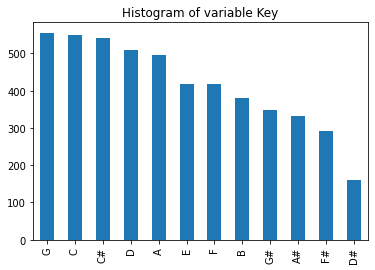

In [ ]:
data.key.describe()
data['key'].value_counts().plot(kind='bar').set_title('Histogram of variable Key')


## Variable liveness
This variable indicates the liveness of the song. This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.

In [ ]:
data.liveness.describe()
# No errors (no values higher than 1 or lower than 0)
px.box(data.liveness, y='liveness')
llout,llout1 = find_outliers_tukey(data['liveness'])
print(llout)
print(llout1)

data.loc[llout, 'liveness'] = np.nan

px.box(data.liveness, y='liveness')

[2, 30, 121, 158, 203, 264, 329, 370, 462, 468, 516, 579, 607, 677, 693, 704, 741, 771, 794, 820, 832, 849, 852, 898, 911, 1062, 1174, 1212, 1228, 1240, 1267, 1306, 1441, 1446, 1518, 1548, 1597, 1619, 1723, 1802, 1835, 1987, 1995, 2013, 2023, 2050, 2098, 2106, 2210, 2220, 2239, 2243, 2253, 2282, 2284, 2301, 2336, 2382, 2399, 2405, 2467, 2592, 2648, 2730, 2739, 2780, 2815, 2825, 2842, 2848, 2866, 2941, 2979, 3022, 3043, 3048, 3056, 3060, 3073, 3105, 3128, 3134, 3211, 3226, 3241, 3262, 3275, 3277, 3290, 3303, 3307, 3316, 3333, 3414, 3417, 3423, 3449, 3453, 3459, 3478, 3479, 3492, 3498, 3610, 3636, 3689, 3733, 3742, 3746, 3962, 3970, 4100, 4139, 4179, 4203, 4233, 4297, 4405, 4439, 4497, 4499, 4500, 4561, 4601, 4907, 4951, 4971, 4978]
[0.942, 0.865, 0.702, 0.818, 0.689, 0.822, 0.847, 0.687, 0.702, 0.692, 0.836, 0.692, 0.833, 0.775, 0.872, 0.879, 0.87, 0.84, 0.857, 0.943, 0.934, 0.742, 0.776, 0.686, 0.701, 0.753, 0.685, 0.708, 0.975, 0.734, 0.703, 0.695, 0.939, 0.702, 0.717, 0.696, 0.752, 0

## Variable loudness
This variable measures how loud a song sounds according to Spotify's LUFS.

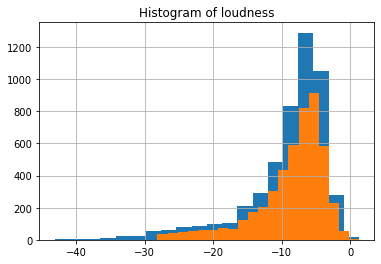

In [ ]:
data.loudness.describe()
hist = data.loudness.hist(bins=20).set_title('Histogram of loudness')
px.box(data.loudness, y='loudness')
# the variable presents extreme inferior outliers

llout,llout1 = find_outliers_tukey(data['loudness'])
data.loc[llout, 'loudness'] = np.nan
hist = data.loudness.hist(bins=20).set_title('Histogram of loudness')
px.box(data.loudness, y='loudness')

## Variable mode
Type of musical scale coupled with a set of characteristic melodic and harmonic behaviors. In the dataset it is applyed to major and minor keys.

Text(0.5, 1.0, 'Histogram of variable Mode')

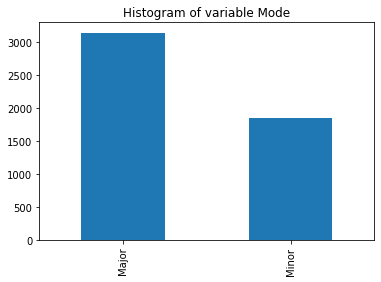

In [ ]:
data['mode'].describe()
data['mode'].value_counts().plot(kind='bar').set_title('Histogram of variable Mode')
# no errors nor missing data


## Variable speechiness
Speechiness detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

In [ ]:
data['speechiness'].describe()
# No errors (no values higher than 1 or lower than 0)
px.box(data.speechiness, y='speechiness')
llout,llout1 = find_outliers_tukey(data['speechiness'])
data.loc[llout, 'speechiness'] = np.nan
px.box(data.speechiness, y='speechiness')

## Variable tempo
Variable tempo describes how fast or slow a piece of music is performed


In [ ]:
data['tempo'].describe()
# variable is numeric but due to missings it is being treated as object
nan_indices = list(data['tempo'].index[(data['tempo'] == '?')])
data.loc[nan_indices, 'tempo'] = np.nan
data['tempo'] = data['tempo'].astype(float)
data['tempo'].describe()

px.box(data.tempo, y='tempo')
# no extreme outliers

## Variable obtained_date
We will detele this variable because it does not provide any significant data to help us with our predictions.

In [ ]:
data['obtained_date'].describe()
data = data.loc[:,data.columns!='obtained_date']

## Variable valence
This variable is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

In [ ]:
data['valence'].describe()
px.box(data.valence, y='valence')
# no extreme outliers

## Variable music_genre

Text(0.5, 1.0, 'Histogram of variable music_genre')

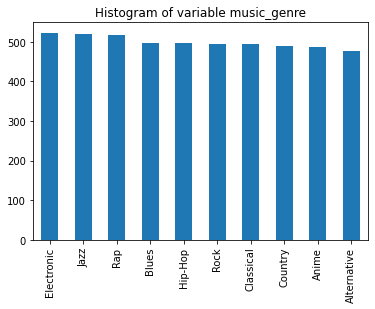

In [ ]:
data['music_genre'].describe()
nan_indices = list(data['music_genre'].index[(data['music_genre'].isnull() )])
data.loc[nan_indices,]
# remove observation because is entirely null
data = data.drop([1010],axis=0)

data['music_genre'].value_counts().plot(kind='bar').set_title('Histogram of variable music_genre')


# Uni-variate description of the data

In [ ]:
data.describe(include='all')

,artist_name,track_name,popularity,acousticness,danceability,duration_s,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,4999,4999,4999.000,4.999e+03,4999.000,4419.000,4.999e+03,4.182e+03,4999,4871.000,4889.000,4999,4645.000,4507.000,4999.000,4999
unique,2327,4866,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,NaN,10
top,empty_field,Save Me,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,Major,NaN,NaN,NaN,Electronic
freq,273,4,NaN,NaN,NaN,NaN,NaN,NaN,556,NaN,NaN,3148,NaN,NaN,NaN,523
mean,NaN,NaN,44.461,3.066e-01,0.559,236.936,5.977e-01,5.379e-02,NaN,0.176,-8.695,NaN,0.072,120.000,0.458,NaN
std,NaN,NaN,15.492,3.410e-01,0.182,77.728,2.658e-01,1.451e-01,NaN,0.122,5.277,NaN,0.058,30.537,0.250,NaN
min,NaN,NaN,0.000,2.730e-06,0.061,28.947,9.530e-04,0.000e+00,NaN,0.019,-28.124,NaN,0.023,47.704,0.024,NaN
25%,NaN,NaN,34.000,2.090e-02,0.436,188.853,4.320e-01,0.000e+00,NaN,0.096,-10.600,NaN,0.036,94.989,0.254,NaN
50%,NaN,NaN,45.000,1.480e-01,0.572,224.320,6.460e-01,1.945e-05,NaN,0.124,-7.241,NaN,0.047,119.490,0.449,NaN
75%,NaN,NaN,56.000,5.560e-01,0.690,270.800,8.080e-01,5.500e-03,NaN,0.225,-5.161,NaN,0.081,140.863,0.653,NaN


## Identify errors or ouliers - unicariate analysis

1.   Elemento de lista
2.   Elemento de lista



#  Missing data

In [ ]:
data.isnull().any()

artist_name         False
track_name          False
popularity          False
acousticness        False
danceability        False
duration_s          True 
energy              False
instrumentalness    True 
key                 False
liveness            True 
loudness            False
mode                False
speechiness         True 
tempo               True 
valence             False
music_genre         False
dtype: bool

In [ ]:
data_num = data.select_dtypes(include=np.number)
imp = IterativeImputer(max_iter=10, random_state=0)
imputed_vals = pandas.DataFrame(imp.fit_transform(data_num), columns=data_num.columns)
data = data.combine_first(imputed_vals)

data = data.dropna()
data.isnull().sum().sum()  # sum of nas in dataframe

data = data[['artist_name','track_name','popularity','duration_s','key','mode','tempo','valence',
              'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','music_genre']]
data.columns

Index(['artist_name', 'track_name', 'popularity', 'duration_s', 'key', 'mode',
       'tempo', 'valence', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'music_genre'],
      dtype='object')

In [ ]:
data.isnull().any()

artist_name         False
track_name          False
popularity          False
duration_s          False
key                 False
mode                False
tempo               False
valence             False
acousticness        False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
music_genre         False
dtype: bool

##Save dataframe into csv

In [ ]:
data.to_csv('sample_5000_con_outliers.csv')

,artist_name,track_name,popularity,duration_s,key,mode,tempo,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,music_genre
0,Fatboy Slim,Sunset (Bird Of Prey) - The Aston Shuffle Remix Edit,21.0,214.000,B,Minor,120.002,0.454,0.004,0.713,0.824,4.920e-01,0.311,-7.475,0.041,Electronic
1,UNKLE,Lonely Soul,51.0,533.013,A,Minor,121.852,0.123,0.078,0.475,0.591,5.490e-02,0.109,-7.854,0.037,Electronic
2,!!!,Our Love (U Can Get),43.0,220.755,C,Major,119.978,0.962,0.169,0.685,0.909,6.630e-04,0.204,-7.627,0.043,Electronic
3,Thievery Corporation,Bario Alto,30.0,233.893,A,Minor,113.475,0.771,0.058,0.815,0.509,1.119e-01,0.095,-12.991,0.049,Electronic
4,Tiga,Bugatti (feat. Pusha T) - Jauz Remix,36.0,330.000,A,Major,127.996,0.487,0.122,0.878,0.921,2.180e-02,0.258,-5.162,0.132,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Lil Rob,Summer Nights,58.0,269.160,A#,Minor,81.813,0.392,0.358,0.472,0.672,0.000e+00,0.108,-4.997,0.212,Hip-Hop
4996,Bone Thugs-N-Harmony,No Surrender,47.0,240.627,A,Major,85.963,0.243,0.013,0.706,0.787,0.000e+00,0.265,-5.314,0.089,Hip-Hop
4997,Nate Dogg,Music & Me,58.0,240.627,G#,Minor,98.028,0.758,0.105,0.905,0.414,3.660e-04,0.091,-8.112,0.061,Hip-Hop
4998,BEXEY,GO GETTA,59.0,262.773,C#,Major,98.028,0.330,0.033,0.913,0.574,0.000e+00,0.119,-7.022,0.044,Hip-Hop


# Bibiography
https://www.musicianonamission.com/spotify-lufs/#:~:text=LUFS%20measure%20how%20loud%20a,ll%20want%20to%20use%20LUFS
